# Bike Shop Analysis

**Situation** : 당신은 바이크샵을 창업하여 여러 제조사의 바이크를 소비자들에게 온/오프라인으로 판매하고 있습니다. 현재 거래 관련 데이터와 고객 정보 데이터를 가지고 있으며 이를 통해 고객을 더욱 늘리고 수익을 개선하고자 합니다. 

**Problem**<br>
1. 데이터를 활용하여 **연령 관련 인사이트**와 **브랜드 관련 인사이트**를 도출해봅시다!<br>

2. 위 인사이트를 활용하여 적절한 방안을 도출해야합니다.(추가적으로 분석한 다른 인사이트도 해결책에 포함되어도 됨)<br>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
MYPATH = '.\\data\\'

customer = pd.read_csv(MYPATH +'customer_info.csv')
transaction = pd.read_csv(MYPATH +'transactions.csv')

# 0. Description of data

In [3]:
# 고객들의 정보가 기록된 데이터입니다
customer

,customer_id,birth_date,wealth_segment,owns_car
0,465,1981-03-26,2,1
1,2867,1960-10-18,3,0
2,610,1963-03-15,1,1
3,41,1981-04-13,1,0
4,155,1990-12-27,1,0
...,...,...,...,...
309,1101,1973-12-21,1,0
310,3127,1976-01-30,1,0
311,1059,1973-02-15,3,1
312,764,1982-03-15,1,1


|                | description                                                                      |
|:---------------|:---------------------------------------------------------------------------------|
| customer_id    | 고객 고유 id (정수)                                                              |
| birth_date     | 고객의 출생일자 (문자열)                                                         |
| wealth_segment | 고객의 가계 자산 상태(1 이상 3이하의 정수) **[숫자가 클 수록 자산 상태가 좋음]** |
| owns_car       | 고객의 자동차 보유 여부 (0또는 1)                                                |

In [4]:
transaction

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,automatic,product_class,product_size,standard_cost
0,15338,S2,465,2021-12-25,1.0,S,1,2,2,53.62
1,13698,N0,2867,2021-01-29,1.0,N,1,2,2,270.30
2,11896,T49,610,2021-04-09,1.0,T,0,2,2,400.13
3,1677,N82,41,2021-04-14,1.0,N,1,3,2,689.18
4,19068,O40,155,2021-08-02,1.0,O,1,3,2,874.90
...,...,...,...,...,...,...,...,...,...,...
1427,1082,N72,718,2021-09-11,0.0,N,1,2,2,270.30
1428,14416,O86,746,2021-05-12,0.0,O,1,2,2,125.07
1429,4437,O99,1068,2021-11-06,1.0,O,1,2,2,770.89
1430,9785,N72,1,2021-01-04,0.0,N,1,2,2,270.30


|                  | description                                                                                                   |
|:-----------------|:--------------------------------------------------------------------------------------------------------------|
| transaction_id   | 거래의 고유 id. 무작위 값 (정수)                                                                              |
| product_id       | 판매된 상품의 고유 id. 브랜드 + 모델번호 형태(문자열) **[모델번호가 0인 경우는 모델번호 기록이 손실된 경우임]** |
| customer_id      | 고객 고유 id (정수)                                                                                           |
| transaction_date | 거래일자 (문자열)                                                                                             |
| online_order     | 온라인 주문 여부 (0 또는 1)                                                                                   |
| brand            | 판매된 오토바이의 브랜드 (문자열)                                                                             |
| automatic        | 자동 변속 여부 (0 또는 1)                                                                                     |
| product_class    | 제품의 분류 (segment) (1 이상 3 이하의 정수) **[숫자가 클수록 상위 트림의 제품임]**                           |
| product_size     | 제품의 크기 (1이상 3 이하의 정수) **[숫자가 클수록 크기가 큰 제품임]**                                        |
| standard_cost    | 실제 판매 가격 (float) **[단위는 만원]**                                                                      |

# 1. Check Data integrity

In [5]:
# customer 데이터에 대해서 무결성을 체크해봅시다

# 1) data type이 description과 일치하는지? -> Yes
customer.dtypes

customer_id        int64
birth_date        object
wealth_segment     int64
owns_car           int64
dtype: object

In [6]:
# 2) data의 unique value가 description과 일치하는지? -> yes

unique_data = {'Unique values':[customer[col].unique() for col in customer.columns],
               'len of values':[customer[col].unique().__len__() for col in customer.columns]}
unique_indice = customer.columns
unique_check_df = pd.DataFrame(index = unique_indice, data = unique_data)
unique_check_df

,Unique values,len of values
customer_id,"[465, 2867, 610, 41, 155, 209, 1068, 1906, 184...",314
birth_date,"[1981-03-26, 1960-10-18, 1963-03-15, 1981-04-1...",309
wealth_segment,"[2, 3, 1]",3
owns_car,"[1, 0]",2


**위 표를 보고 알 수 있는 간단한 정보들**

1. **[PK Column Check]** 총 고객은 314명이며, customer의 행의 개수와 같은 것으로 보아 customer_id가 고유하다는 description은 맞다.<br>

2. birth_date의 개수가 309인 것으로 보아, 생일이 같은 사람이 존재한다.<br>

In [7]:
# transaction 데이터에 대해서 무결성을 체크해봅시다

# 1) data type이 description과 일치하는지? -> Yes
transaction.dtypes

transaction_id        int64
product_id           object
customer_id           int64
transaction_date     object
online_order        float64
brand                object
automatic             int64
product_class         int64
product_size          int64
standard_cost       float64
dtype: object

In [8]:
# 2) data의 unique value가 description과 일치하는지? -> yes

unique_data = {'Unique values':[transaction[col].unique() for col in transaction.columns],
               'len of values':[transaction[col].unique().__len__() for col in transaction.columns]}
unique_indice = transaction.columns
unique_check_df = pd.DataFrame(index = unique_indice, data = unique_data)
unique_check_df

,Unique values,len of values
transaction_id,"[15338, 13698, 11896, 1677, 19068, 13456, 760,...",1432
product_id,"[S2, N0, T49, N82, O40, N28, S8, T14, S97, G4,...",134
customer_id,"[465, 2867, 610, 41, 155, 209, 1068, 1906, 184...",314
transaction_date,"[2021-12-25, 2021-01-29, 2021-04-09, 2021-04-1...",357
online_order,"[1.0, 0.0, nan]",3
brand,"[S, N, T, O, G, W]",6
automatic,"[1, 0]",2
product_class,"[2, 3, 1]",3
product_size,"[2, 3, 1]",3
standard_cost,"[53.62, 270.3, 400.13, 689.18, 874.9, 1082.36,...",79


**위 표를 보고 알 수 있는 간단한 정보들**

1. **[PK Column Check]** 총 거래량은 1432이며, transaction의 행의 개수와 같은 것으로 보아 transaction_id가 고유하다는 description은 맞다. <br>

2. **[FK Column Check]** customer_id가 314개로, customer 테이블에 있는 모든 사람은 적어도 한 번 이상의 거래를 했다. outer join을 하든 inner join을 하던 관계없을 것이다.<br>

3. 브랜드는 3개인데 product_id가 134개나 되는거보면, 각 브랜드 당 모델번호가 꽤 많은 듯하다.<br>

4. 기타 다른 칼럼들도 정합성을 만족한다. 좋은 데이터 인듯! 

# 2. Nan Handling & merge data

In [9]:
# customer data는 nan값이 없다

customer.isnull().sum()

customer_id       0
birth_date        0
wealth_segment    0
owns_car          0
dtype: int64

In [10]:
# transaction data는 Online_order에서 nan값이 존재한다

transaction.isnull().sum()

transaction_id       0
product_id           0
customer_id          0
transaction_date     0
online_order        27
brand                0
automatic            0
product_class        0
product_size         0
standard_cost        0
dtype: int64

In [11]:
# online_order의 nan값을 채우거나, 드랍을 하는 것을 결정하기 위해서 nan값이 어떻게 발생했는지 점검해보자

# 눈에 보이는 특징은 없다! -> 무작위로 발생했을 가능성 or 외부 요인에 의한 nan값 
# 1432행중 27행 정도 되므로 드랍해도 괜찮을 것으로 판단
transaction[transaction['online_order'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,automatic,product_class,product_size,standard_cost
118,5062,G94,1057,2021-11-11,NaN,G,1,2,1,993.66
121,1355,W92,1864,2021-02-27,NaN,W,1,2,3,1259.36
195,12403,G4,2007,2021-06-25,NaN,G,1,3,2,677.48
213,15815,N79,943,2021-07-01,NaN,N,1,2,2,818.01
284,17890,N67,3327,2021-01-26,NaN,N,0,2,2,376.84
291,12073,S2,1207,2021-02-22,NaN,S,1,2,2,53.62
418,19636,T98,1389,2021-07-25,NaN,T,1,3,2,215.03
420,844,O40,3412,2021-07-08,NaN,O,1,3,2,874.90
458,9771,O25,1800,2021-05-13,NaN,O,1,3,2,1203.40
500,3201,G1,1182,2021-08-24,NaN,G,1,2,2,954.82


In [12]:
# 결측치 제거
transaction.dropna(inplace=True)

# 두 데이터를 병합해보자
data = pd.merge(transaction, customer, on='customer_id')

# 결측치를 제거하고 최종적으로 1405행이 분석 대상이다!
data

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,automatic,product_class,product_size,standard_cost,birth_date,wealth_segment,owns_car
0,15338,S2,465,2021-12-25,1.0,S,1,2,2,53.62,1981-03-26,2,1
1,17216,T98,465,2021-11-06,1.0,T,1,3,2,215.03,1981-03-26,2,1
2,8305,T7,465,2021-08-01,1.0,T,0,1,2,234.43,1981-03-26,2,1
3,7355,W76,465,2021-02-21,0.0,W,1,1,2,513.85,1981-03-26,2,1
4,13698,N0,2867,2021-01-29,1.0,N,1,2,2,270.30,1960-10-18,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,19351,G1,764,2021-06-12,1.0,G,1,2,2,954.82,1982-03-15,1,1
1401,15897,G33,764,2021-08-18,1.0,G,1,2,3,1167.18,1982-03-15,1,1
1402,7957,S21,1471,2021-04-15,1.0,S,1,2,1,380.74,1983-02-23,1,0
1403,4443,G25,2957,2021-03-08,1.0,G,0,2,2,829.65,1974-11-20,2,0


# 3. Dtype change & Feature Engineering

In [13]:
# 데이터 타입을 다루기 쉽게 바꿔줍시다

# 날짜는 DATETIME으로 바꿔줍니다
data['birth_date'] = pd.to_datetime(data['birth_date'])
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

# Nan값을 제거한 online_order를 정수형으로 바꿔줍시다
data['online_order'] = data['online_order'].astype(int)

In [14]:
# 데이터를 더 잘 다루기 위해서, 기존 열을 바탕으로 새로운 열을 만들거나 분해해줍시다

import datetime
import math

# age 열 생성하기
today = datetime.date.today()
y = today.year
data['age'] = (y - data['birth_date'].dt.year) + 1 
data['ages']  = data['age'] - data['age']%10 # 10년 단위로 age를 표기

# 모델 번호 열 생성하기
data['model_number'] = [string[1:] for string in data['product_id']]
data['model_number'] = data['model_number'].astype(int)

# transaction_date 분해하기
data['tran_year'] = data['transaction_date'].dt.year
data['tran_month'] = data['transaction_date'].dt.month
data['tran_day'] =  data['transaction_date'].dt.day

# birth_date 분해하기
data['birth_year'] = data['birth_date'].dt.year
data['birth_month'] = data['birth_date'].dt.month
data['birth_day'] =  data['birth_date'].dt.day

# 필요없는 열들은 드랍해줍시다
data = data.drop(['product_id'],axis=1) 

# 만들어진 최종 데이터
data

,transaction_id,customer_id,transaction_date,online_order,brand,automatic,product_class,product_size,standard_cost,birth_date,...,owns_car,age,ages,model_number,tran_year,tran_month,tran_day,birth_year,birth_month,birth_day
0,15338,465,2021-12-25,1,S,1,2,2,53.62,1981-03-26,...,1,42,40,2,2021,12,25,1981,3,26
1,17216,465,2021-11-06,1,T,1,3,2,215.03,1981-03-26,...,1,42,40,98,2021,11,6,1981,3,26
2,8305,465,2021-08-01,1,T,0,1,2,234.43,1981-03-26,...,1,42,40,7,2021,8,1,1981,3,26
3,7355,465,2021-02-21,0,W,1,1,2,513.85,1981-03-26,...,1,42,40,76,2021,2,21,1981,3,26
4,13698,2867,2021-01-29,1,N,1,2,2,270.30,1960-10-18,...,0,63,60,0,2021,1,29,1960,10,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,19351,764,2021-06-12,1,G,1,2,2,954.82,1982-03-15,...,1,41,40,1,2021,6,12,1982,3,15
1401,15897,764,2021-08-18,1,G,1,2,3,1167.18,1982-03-15,...,1,41,40,33,2021,8,18,1982,3,15
1402,7957,1471,2021-04-15,1,S,1,2,1,380.74,1983-02-23,...,0,40,40,21,2021,4,15,1983,2,23
1403,4443,2957,2021-03-08,1,G,0,2,2,829.65,1974-11-20,...,0,49,40,25,2021,3,8,1974,11,20


In [15]:
# 최종적인 데이터 타입입니다
data.dtypes

transaction_id               int64
customer_id                  int64
transaction_date    datetime64[ns]
online_order                 int32
brand                       object
automatic                    int64
product_class                int64
product_size                 int64
standard_cost              float64
birth_date          datetime64[ns]
wealth_segment               int64
owns_car                     int64
age                          int64
ages                         int64
model_number                 int32
tran_year                    int64
tran_month                   int64
tran_day                     int64
birth_year                   int64
birth_month                  int64
birth_day                    int64
dtype: object

# 4. EDA

독립변수가 많기 때문에, 모든 요인을 분석하고 정리할 수 없습니다.<br>

빠른 호흡으로 데이터 분석이 이루어져야 하는 상황이라면, 핵심 요인에 대해서 생각해보고 그것을 우선적으로 살펴보아야 합니다.<br>

**연령 관련 인사이트** / **브랜드 관련 인사이트** 도출이 요구사항이므로 이를 먼저 살펴봅니다.<br>

이때, 이들이 매출과 어떤 관련이 있는지를 중심으로 살펴봅시다.

### 4-1. 나이와 구매행태

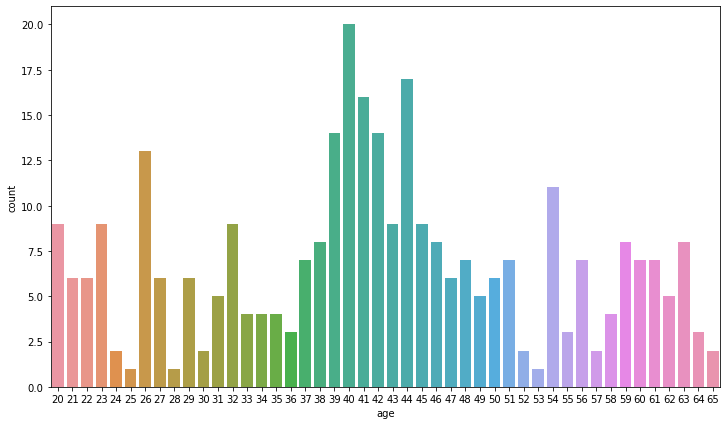

In [16]:
# 사람들의 age / ages 분포는 어떻게 될까?
age_df = data[['customer_id','age','ages']].drop_duplicates()

# age 열에 대하여

plt.figure(figsize=(12,7))
sns.countplot('age', data = age_df)

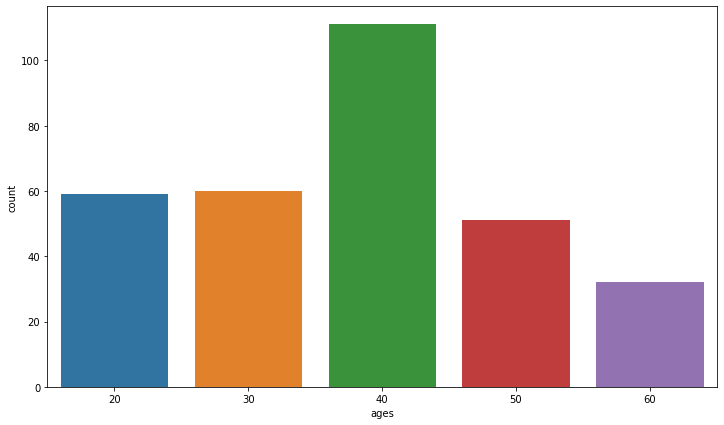

In [17]:
# ages 열에 대하여

plt.figure(figsize=(12,7))
sns.countplot('ages', data = age_df)

40대가 가장 주요한 고객임을 알 수 있음. 특히 40대 초반이 많음 <br>

20대와 30대는 비슷한 수준임. <br>

50대와 60대는 적은 편이다. <br>

나이에 관한 정보를 인사이트로 뽑아보기 위해서는, 구매행태와 이 정보를 엮어보아야 할 것같습니다.<br>

따라서 **나이대에 따른 구매행태**를 살펴보아야 인사이트 발굴이 가능할 것이라 생각됩니다.

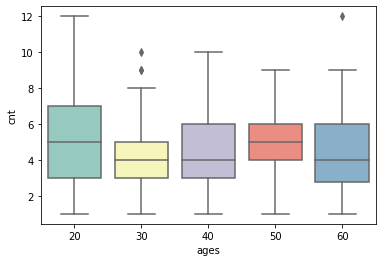

In [18]:
# 나이에 따른 구매행태 파악해보기

# 1) 나이대별 구매횟수

cust_buying_cnt = data.groupby('customer_id').count()['transaction_id'].rename_axis('customer_id').reset_index().rename(columns = {'transaction_id':'cnt'})
cust_buying_with_ages = pd.merge(data, cust_buying_cnt, on='customer_id')[['customer_id','cnt','age','ages']].drop_duplicates()

# boxplot
sns.boxplot(x="ages", y='cnt', data=cust_buying_with_ages, palette="Set3")

In [19]:
# in number
cust_buying_with_ages.groupby('ages').mean()['cnt']

ages
20    4.915254
30    4.083333
40    4.378378
50    4.803922
60    4.343750
Name: cnt, dtype: float64

Point 1 : 40대가 고객으로 등록된 사람은 제일 많았는데, 의외로 평균 구매 건수는 낮은 편이다.<br>

Point 2 : 20대가 중복해서 구매하는 사람이 매우 많은 편이다. 30대와 인원수가 비슷한데도 평균이 1정도 차이나는 것을 감안하면, 소수의 사람들이 많은 구매를 올리고 있는 나이대이다. <br>

Point 3 : 50대는 20대보다 더 적은 수로 회원으로 등록되어있음에도, 20대에 버금가는 꽤 높은 수치이다.<br>

In [20]:
# 2) 나이대별 구매 주기

unique_cust_ids = list(data['customer_id'].unique())
cust_buying_freq_df = pd.DataFrame(index=unique_cust_ids)

for cust_id in unique_cust_ids:
    cust_personal_buying = data[data['customer_id'] == cust_id].sort_values(by='transaction_date').reset_index(drop=True)
    cust_personal_buying['lag_date'] = cust_personal_buying['transaction_date'].shift(1)
    cust_personal_buying['buying_diff'] = cust_personal_buying['transaction_date'] - cust_personal_buying['lag_date']
    mean_buying_freq = cust_personal_buying['buying_diff'].mean().days
    cust_buying_freq_df.loc[cust_id,'mean_buying_freq'] = mean_buying_freq

# 나이대 별 평균 구매주기를 구해줍니다.
# 구매가 한 번밖에 없는 사람은 구매주기가 nan값으로 집계됩니다.
cust_buying_freq_df = cust_buying_freq_df.reset_index().rename(columns = {'index':'customer_id'})
cust_buying_freq_df = pd.merge(data,cust_buying_freq_df,on='customer_id')[['customer_id','mean_buying_freq','ages']].drop_duplicates().reset_index(drop=True)
cust_buying_freq_df

,customer_id,mean_buying_freq,ages
0,465,102.0,40
1,2867,60.0,60
2,610,39.0,60
3,41,51.0,40
4,155,176.0,30
...,...,...,...
308,3127,NaN,40
309,1059,126.0,50
310,764,67.0,40
311,1471,NaN,40


In [21]:
# 구매를 단 한 번만 한 사람은 19명이네요!
# 즉, 313명 중 19명을 제외하고는 다 바이크를 두 번 이상 구매한 사람들입니다!

cust_buying_freq_df.isnull().sum()

customer_id          0
mean_buying_freq    19
ages                 0
dtype: int64

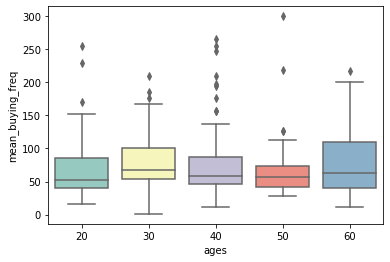

In [22]:
# boxplot

sns.boxplot(x="ages", y='mean_buying_freq', data=cust_buying_freq_df, palette="Set3")

In [23]:
# in number

cust_buying_freq_df.groupby('ages').describe()['mean_buying_freq']

,count,mean,std,min,25%,50%,75%,max
ages,,,,,,,,
20,55.0,69.000000,47.616913,16.0,39.50,52.0,85.50,255.0
30,57.0,78.298246,45.752035,1.0,54.00,67.0,100.00,210.0
40,103.0,75.485437,49.151001,11.0,45.50,58.0,87.00,265.0
50,49.0,69.428571,47.602083,28.0,42.00,57.0,74.00,300.0
60,30.0,79.766667,56.925047,12.0,40.25,62.5,109.25,217.0


Point 1 : 20대가 바이크 구매를 더 자주 하는 편입니다. 사람 수는 적으면서, 구매 수는 많고, 더 자주하는 잠재력 가득한 고객들입니다.<br>

Point 2 : 40대는 구매 주기 측면에서는 평범해보입니다!.<br>

### 4-2. brand별 특성

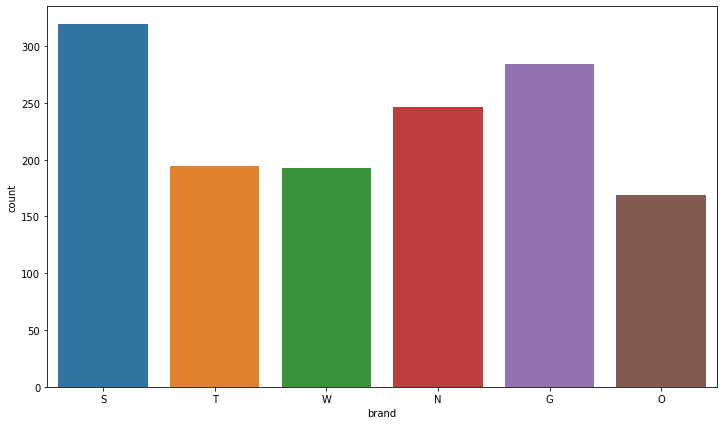

In [24]:
# brand 열에 대하여

plt.figure(figsize=(12,7))
sns.countplot('brand', data =data)

# S와 G브랜드가 가장 많이 판매되는 모습입니다

**S > G > N > T > W > O** 순으로 판매량이 많음을 알 수 있음 

In [25]:
# brand를 설명하는 요소들)
# ['automatic', 'product_class', 'product_size','model_number','standard_cost'] 등으로 brand를 설명할 수 있을 것입니다.

brand_explain_features = ['brand','automatic', 'product_class', 'product_size','model_number','standard_cost']
brand_explain_df = data[brand_explain_features].drop_duplicates()

# 특징 파악을 위해 중복값을 제거한 이 df를 사용합니다!
brand_explain_df

,brand,automatic,product_class,product_size,model_number,standard_cost
0,S,1,2,2,2,53.62
1,T,1,3,2,98,215.03
2,T,0,1,2,7,234.43
3,W,1,1,2,76,513.85
4,N,1,2,2,0,270.30
...,...,...,...,...,...,...
1005,S,0,2,3,28,1516.13
1033,N,1,2,3,61,521.94
1261,T,1,2,2,0,388.72
1339,T,1,2,3,11,1580.47


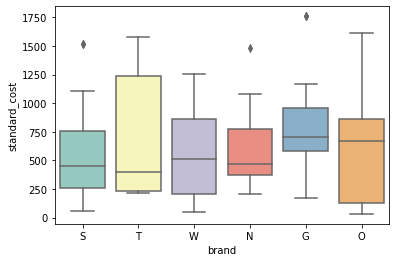

In [26]:
# brand별 특징을 파악해봅시다

# 1) brand별 가격

# boxplot
sns.boxplot(x="brand", y='standard_cost', data=brand_explain_df, palette="Set3")

브랜드 별 가격에 대해서 살펴보려면, 가격의 분포만으로 판단할 수 없습니다.<br>

상품의 크기(product_size), 모델번호(model_number), 모델 클래스(product_class)를 같이 고려해야합니다<br> 

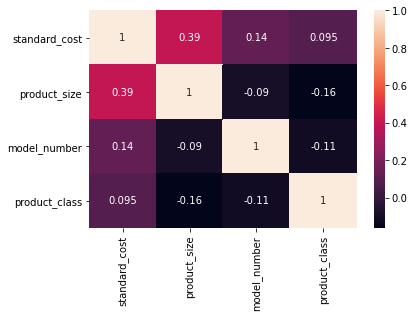

In [27]:
# 가격과 3가지 요소에 대한 상관관계를 살펴봅시다

sns.heatmap(brand_explain_df[['standard_cost','product_size','model_number','product_class']].corr(),annot=True)

가격이랑 관련있는 요소는 **product_size**인 것으로 보입니다. model_number, product_class랑은 크게 관련이 없네요!<br>

product_class가 높을수록 상위트림이라고 했는데, 정말로 그게 관련이 없는 것일까요? 한 번 자세히 봅시다!

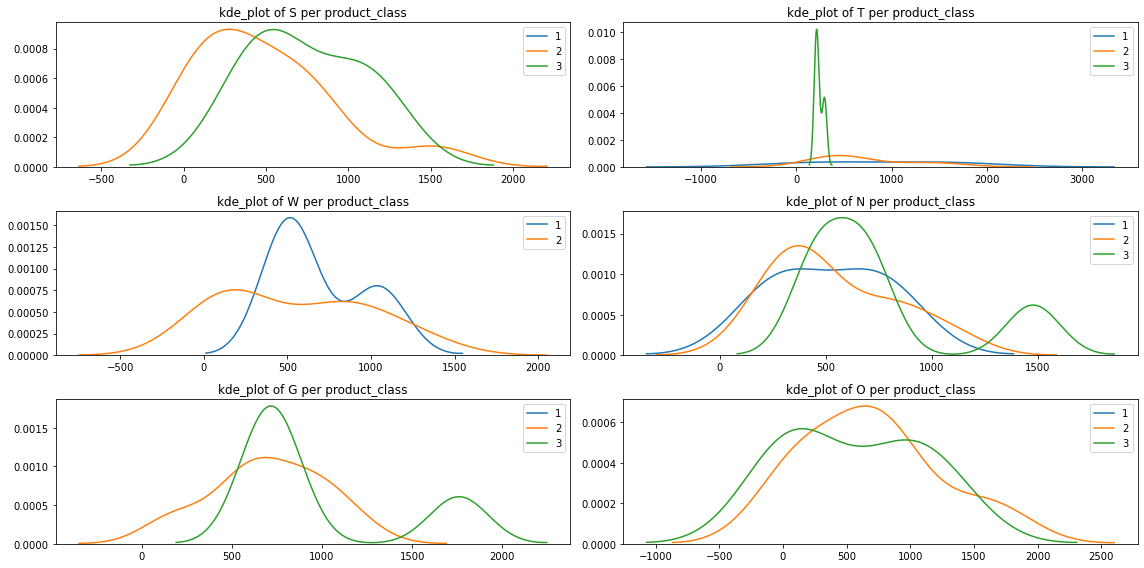

In [28]:
# brand별 product_class의 가격 분포
import warnings
# 경고창 숨기기
warnings.filterwarnings('ignore')
  
fig = plt.figure(figsize=(16,8))

for i,brand in enumerate(brand_explain_df['brand'].unique()):
    brand_df = brand_explain_df[brand_explain_df['brand'] == brand][['standard_cost','product_class']]
    for pro_class in sorted(list(brand_df['product_class'].unique())):
        fig.add_subplot(3,2,i+1)
        plt.title('kde_plot of {0} per product_class'.format(brand))
        sns.kdeplot(brand_df[brand_df['product_class']==pro_class]['standard_cost'], label=pro_class)
        fig.tight_layout()

모든 브랜드에서 product_class별로 가격이 몰려서 형성되어 있지 않음을 볼 수 있네요! 따라서 가격과 product_class는 별로 관련이 없는듯 합니다<br>

In [29]:
# 동일 product_size별 브랜드의 가격 차이를 보면, 진짜 브랜드의 가격 경향성을 알 수 있겠네요!

size_price_df = pd.DataFrame(index = list(brand_explain_df['brand'].unique()))
cnt_df = pd.DataFrame(index = list(brand_explain_df['brand'].unique()))

for product_size in sorted(list(brand_explain_df['product_size'].unique())):
    tmp_size_price_df = brand_explain_df[brand_explain_df['product_size'] == product_size]
    mean_price = tmp_size_price_df.groupby('brand').mean()['standard_cost']
    size_price_df['product_size_{0}'.format(product_size)] = mean_price
    
    cnt_df['product_size_{0}'.format(product_size)] = tmp_size_price_df.groupby('brand').count()['standard_cost']

# 가격에 대해서 mean 값을 도출하여 경향성을 파악해봅니다!
size_price_df

,product_size_1,product_size_2,product_size_3
S,628.004444,393.802381,1516.130000
T,597.655000,291.302727,1448.726667
W,NaN,498.057143,765.266000
N,629.910000,465.403333,937.542000
G,703.512500,641.047333,1150.786667
O,32.445000,533.636667,1610.900000


In [30]:
# 위 데이터 프레임에 대한 항목별 개수를 구한것입니다!
cnt_df

,product_size_1,product_size_2,product_size_3
S,9.0,21,2
T,4.0,11,6
W,NaN,14,5
N,4.0,18,5
G,8.0,15,6
O,2.0,18,2


product_class를 통제한 상태에서 (product_size와 product_class)에 따른 가격을 살펴보았습니다.<br>

product_size = 1, 3인 경우, 개체가 너무 적어 경향성을 따지기에 부적합합니다.<br>

따라서, product_size = 2인 경우에만 고려하여 경향성을 따지는 것이 바람직합니다. (사실, product_size = 2인 경우에도 부족한 편이긴 합니다)<br>

이에따라, 

* **고가 브랜드 : G,O** <br>

* **중저가 브랜드 : W, N** <br>

* **저가 브랜드 : S, T** <br>

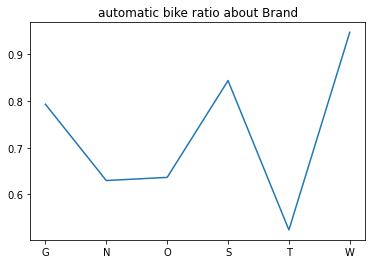

In [31]:
# 2) brand별 auto 비율

plt.title('automatic bike ratio about Brand')
plt.plot(brand_explain_df.groupby('brand').mean()['automatic'])

대부분의 오토바이가 0.5이상의 auto 비율을 가지고 있고, **W가 압도적으로 auto비율이 높고, T는 제일 낮은 것으로 관측됩니다**

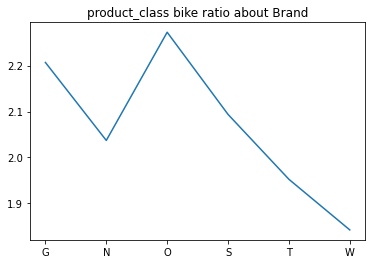

In [32]:
# 3) brand별 product_class 

plt.title('product_class bike ratio about Brand')
plt.plot(brand_explain_df.groupby('brand').mean()['product_class'])

대부분의 오토바이가 product_class = 2에서 많이 팔리고 있음을 알 수 있습니다.<br>

**O가 상위트림이 많이 팔리고, W가 하위트림이 많이 팔리는 것을 관찰 가능합니다**<br>

다만, 위에서 관찰했듯이 product_class는 가격을 설명하지 못하는 변수이므로, 딱히 인사이트가 될 것같지는 않습니다.

In [33]:
# 3) brand별 model_number
brand_explain_df[['brand','model_number']].drop_duplicates().groupby('brand').count()

,model_number
brand,
G,28
N,24
O,18
S,28
T,18
W,18


각 브랜드별로 다양한 model_number로 제품을 내고 있습니다. **G와 S가 다양한 제품을 많이 내고 있음을 관찰가능 합니다!**

In [34]:
# 4) brand별 product_size
crosstab = pd.crosstab(brand_explain_df['product_size'], brand_explain_df.brand,margins=True).T

for col in crosstab.columns:
    crosstab.loc[crosstab.index.difference(['All']),col] = crosstab.loc[crosstab.index.difference(['All']),col] / crosstab.loc['All',col]
crosstab = crosstab.drop('All',axis=1)  

# 비율로 확인해봐요
crosstab.style.background_gradient(cmap='summer_r')

# product_size = 1이라면 S브랜드를 사람들이 많이 이용하네요(압도적)
# product_size = 2이라면 S브랜드를 사람들이 많이 이용하네요
# product_size = 3이라면 G브랜드를 사람들이 많이 이용하네요

product_size,1,2,3
brand,,,
G,0.296296,0.154639,0.230769
N,0.148148,0.185567,0.192308
O,0.074074,0.185567,0.076923
S,0.333333,0.216495,0.076923
T,0.148148,0.113402,0.230769
W,0.000000,0.144330,0.192308
All,27.000000,97.000000,26.000000


### 4-3) 나이와 brand

In [35]:
# 나이와 brand에 따른 판매량을 봅시다

pd.crosstab(data.brand,data.ages,margins=True).style.background_gradient(cmap='summer_r')

ages,20,30,40,50,60,All
brand,,,,,,
G,60,32,109,50,33,284
N,50,45,87,36,28,246
O,37,28,57,31,16,169
S,66,63,107,56,27,319
T,38,43,55,37,21,194
W,39,34,71,35,14,193
All,290,245,486,245,139,1405


* 20대가 선호하는 브랜드 : **S,G** <br>
* 30대가 선호하는 브랜드 : **S(압도적)** <br>
* 40대가 선호하는 브랜드 : **S,G** <br>
* 50대가 선호하는 브랜드 : **S,G** <br>
* 60대가 선호하는 브랜드 : **G** <br>

### 4-4) 매출 관련

In [36]:
# 브랜드별 매출 요약통계량
data.groupby('brand').describe()['standard_cost']

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
G,284.0,773.865599,310.209316,173.180,582.48,709.48,954.82,1759.85
N,246.0,576.623902,318.842478,206.350,376.84,464.72,748.90,1479.11
O,169.0,561.573254,481.937949,32.445,125.07,667.40,874.90,1610.90
S,319.0,488.713511,362.694820,53.620,151.96,431.45,733.58,1516.13
T,194.0,662.645928,485.554433,215.030,297.43,400.13,1234.29,1580.47
W,193.0,592.781969,407.048900,45.260,131.92,762.63,950.52,1259.36


브랜드별 평균 매출은 **G > T > W > N > O > S**로 나타납니다. S는 판매량은 많았지만, 의외로 매출면에서는 저조하네요 

In [37]:
# 나이별 매출 요약통계량
data.groupby('ages').describe()['standard_cost']

,count,mean,std,min,25%,50%,75%,max
ages,,,,,,,,
20,290.0,594.618897,410.552987,32.445,243.3975,582.48,818.01,1759.85
30,245.0,597.741163,384.311368,32.445,297.4300,525.33,820.78,1610.90
40,486.0,600.393591,388.265833,32.445,292.1650,582.48,826.51,1759.85
50,245.0,635.627000,413.935466,32.445,298.7200,596.55,874.90,1759.85
60,139.0,640.194712,415.127462,32.445,280.3550,667.40,829.65,1759.85


나이대 별로 살펴본 평균 매출은 **60 ~ 50 > 40 ~ 20 ~ 30**인 것을 알 수 있습니다.

### 4-5) 기타 Insight

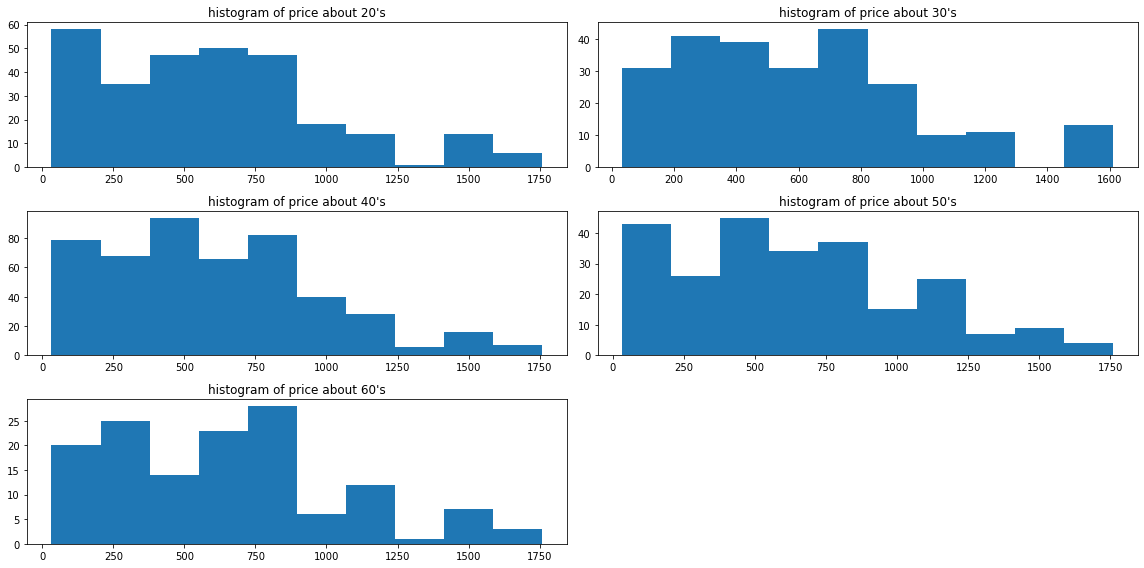

In [38]:
# 20대가 저가 오토바이를 주로 구매하는 편인가?

fig = plt.figure(figsize=(16,8))

for i, age in enumerate(sorted(list(data['ages'].unique()))):
    price_per_ages = data[data['ages'] == age]['standard_cost']
    fig.add_subplot(3,2,i+1)
    plt.title("histogram of price about {0}'s".format(age))
    plt.hist(price_per_ages, label=age)
    fig.tight_layout()
    
# 그런 것 같지는 않아보인다. 모든 나이대에서 right-skewed한 모습.

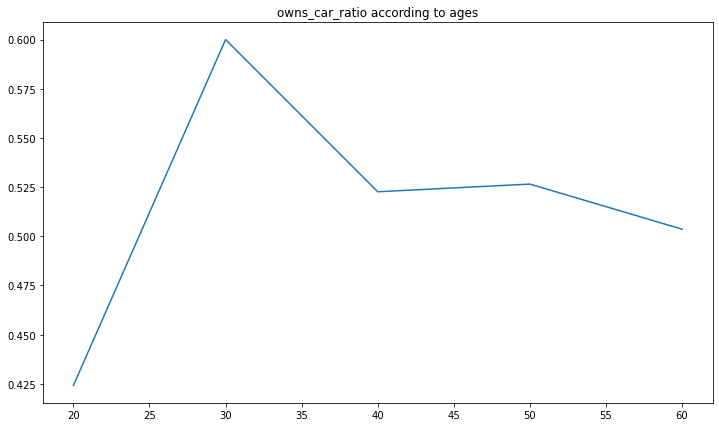

In [39]:
# owns_car 비율이 특정 나이대에서 두드러지는가?

mean_owns_car_ratios = []
for age in sorted(list(data['ages'].unique())):
    owns_car_per_ages = data[data['ages'] == age]['owns_car']
    mean_owns_car_ratios.append(owns_car_per_ages.mean())

plt.figure(figsize=(12,7))
plt.title('owns_car_ratio according to ages')
sns.lineplot(x=sorted(list(data['ages'].unique())), y=mean_owns_car_ratios)

# 1) 20대에서 자차비율이 제일 낮다
# 2) 30대에서 자차비율이 제일 높다
# 3) 40-60대는 중간수준

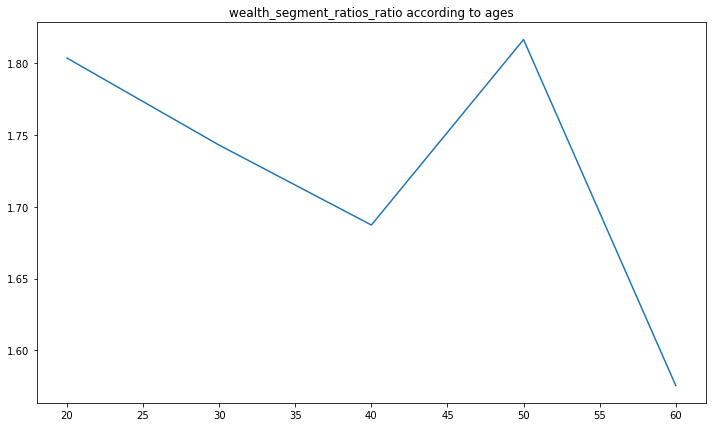

In [40]:
# wealth_segment 비율이 특정 나이대에서 두드러지는가?

mean_wealth_segment_ratios = []
for age in sorted(list(data['ages'].unique())):
    wealth_segment_per_ages = data[data['ages'] == age]['wealth_segment']
    mean_wealth_segment_ratios.append(wealth_segment_per_ages.mean())

plt.figure(figsize=(12,7))
plt.title('wealth_segment_ratios_ratio according to ages')
sns.lineplot(x=sorted(list(data['ages'].unique())), y=mean_wealth_segment_ratios)

# 부의 수준은 50대가 제일 많네요. 반면에 60대가 제일 가난한 편입니다.
# 편견과는 다르게 20대가 의외로 돈이 많아요
# 40대는 오히려 돈이 더 적네요

In [41]:
# 연령대별 마니아 층에 대한 정보를 얻기 위해 불순도 개념을 이용해봅시다!

def calculate_gini_impurity(cust_id):
    personal_df = data[data['customer_id']==cust_id]
    
    brands = list(personal_df['brand'].unique())
    
    if personal_df.shape[0] == 1:
        gini = -1
    
    else:
        count_dict ={}
        for brand in brands:
            count_dict[brand] = 0
            
        for brand in personal_df['brand']:
            count_dict[brand] += 1
        
        gini = 1
        for brand in brands:
            numerator = count_dict[brand]
            denominator = len(personal_df['brand'])
            gini -= (numerator/denominator)**2
    
    return round(gini,2)

# gini_df를 얻습니다
gini_df = pd.DataFrame(index=data['customer_id'].unique())

for customer_id in list(data['customer_id'].unique()):
    gini_df.loc[customer_id,'gini'] = calculate_gini_impurity(customer_id)

# -1은 구매를 단 한 번만 한 유저를 의미합니다.
# 불순도가 0일 수록 하나의 브랜드를 다수 구매했다는 의미이므로 마니아에 가깝다고 할 수 있습니다.
# 1에 가까울수록 이것저것 섞어서 많이 구매했다는 의미입니다.
gini_df = gini_df.reset_index().rename(columns={'index':'customer_id'})
gini_df

,customer_id,gini
0,465,0.62
1,2867,0.64
2,610,0.72
3,41,0.69
4,155,0.67
...,...,...
308,3127,-1.00
309,1059,0.00
310,764,0.00
311,1471,-1.00


In [42]:
# 연령대별 gini 값의 mean을 구해보았습니다.
gini_result_df = pd.merge(data, gini_df, on='customer_id')
gini_result_df.groupby('ages').mean()['gini']

# 40대가 상대적으로 마니아층이 제일 많고, 50대가 마니아층이 제일 적네요.
# 하지만 모든 연령대에서 그렇게 극적으로 차이가 나는 것은 아니라서, 경향성에 대해 단정지을 수는 없겠습니다.

ages
20    0.646621
30    0.615429
40    0.586461
50    0.657918
60    0.605683
Name: gini, dtype: float64

Text(0, 0.5, 'count')

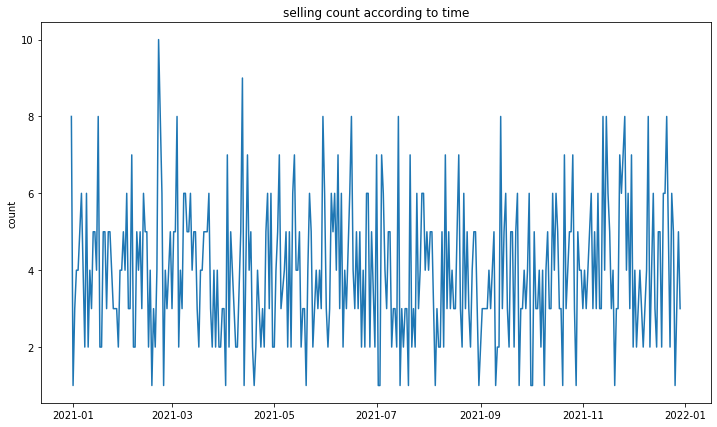

In [43]:
# 시간에 따른 판매량 변화

plt.figure(figsize=(12,7))
plt.title('selling count according to time')
plt.plot(data.groupby('transaction_date').count()['transaction_id'])
plt.ylabel('count')

# 우상향이라기 보다는 약간의 계절성이 있음을 알 수 있습니다.(검정을 통해 밝힐 수 있지만, 넘어가도록 합시다.)

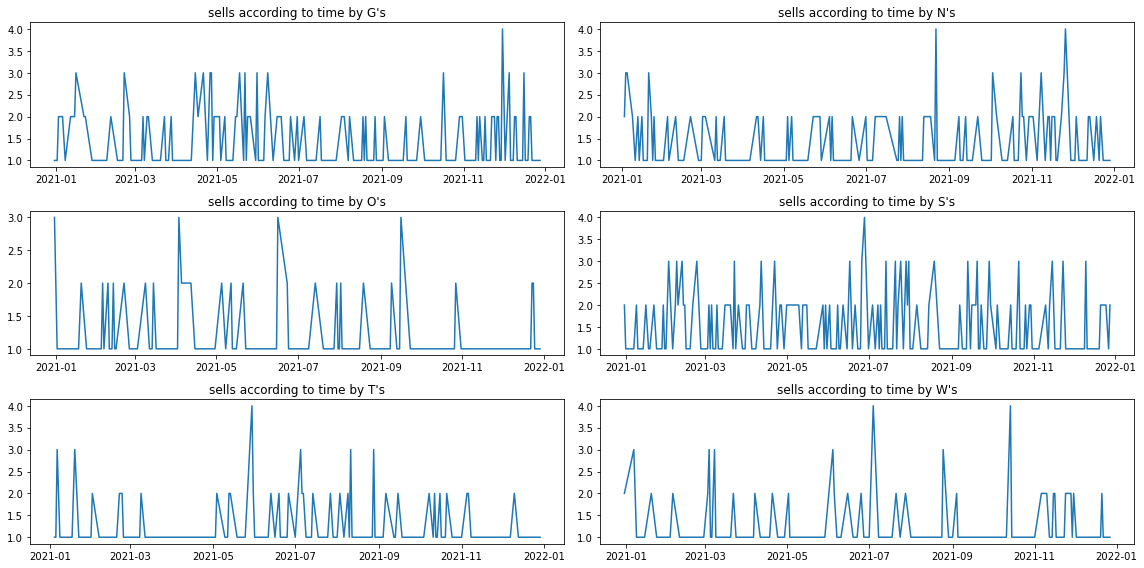

In [44]:
# 시간에 따른 브랜드별 판매량 변화

fig = plt.figure(figsize=(16,8))

for i, brand in enumerate(sorted(list(data['brand'].unique()))):
    sell_per_brand = data[data['brand'] == brand]
    brand_sell_per_time = sell_per_brand.groupby('transaction_date').count()['standard_cost']
    fig.add_subplot(3,2,i+1)
    plt.title("sells according to time by {0}'s".format(brand))
    plt.plot(brand_sell_per_time, label=brand)
    fig.tight_layout()

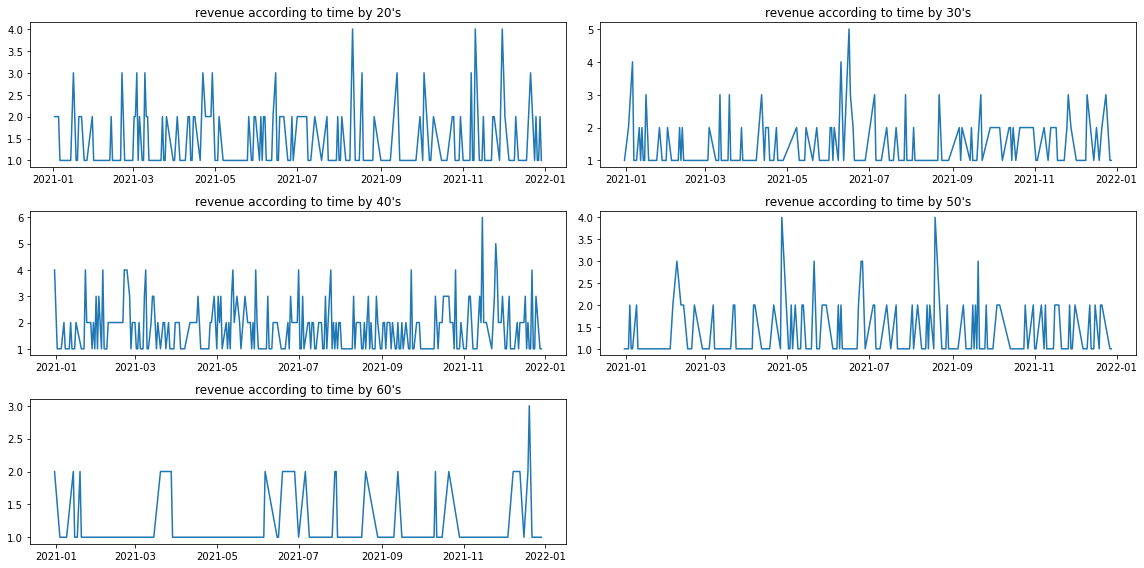

In [45]:
# 시간에 따른 연령대별 판매량 변화

fig = plt.figure(figsize=(16,8))

for i, age in enumerate(sorted(list(data['ages'].unique()))):
    sells_per_ages = data[data['ages'] == age]
    sells_rev_per_time = sells_per_ages.groupby('transaction_date').count()['standard_cost']
    fig.add_subplot(3,2,i+1)
    plt.title("revenue according to time by {0}'s".format(age))
    plt.plot(sells_rev_per_time, label=age)
    fig.tight_layout()

Text(0, 0.5, 'count')

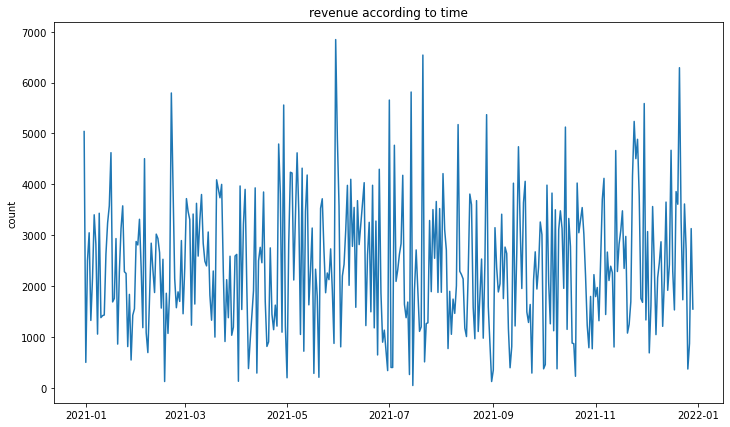

In [46]:
# 시간에 따른 매출 변화

plt.figure(figsize=(12,7))
plt.title('revenue according to time')
plt.plot(data.groupby('transaction_date').sum()['standard_cost'])
plt.ylabel('count')

# 매출 역시도 판매량과 비슷합니다.

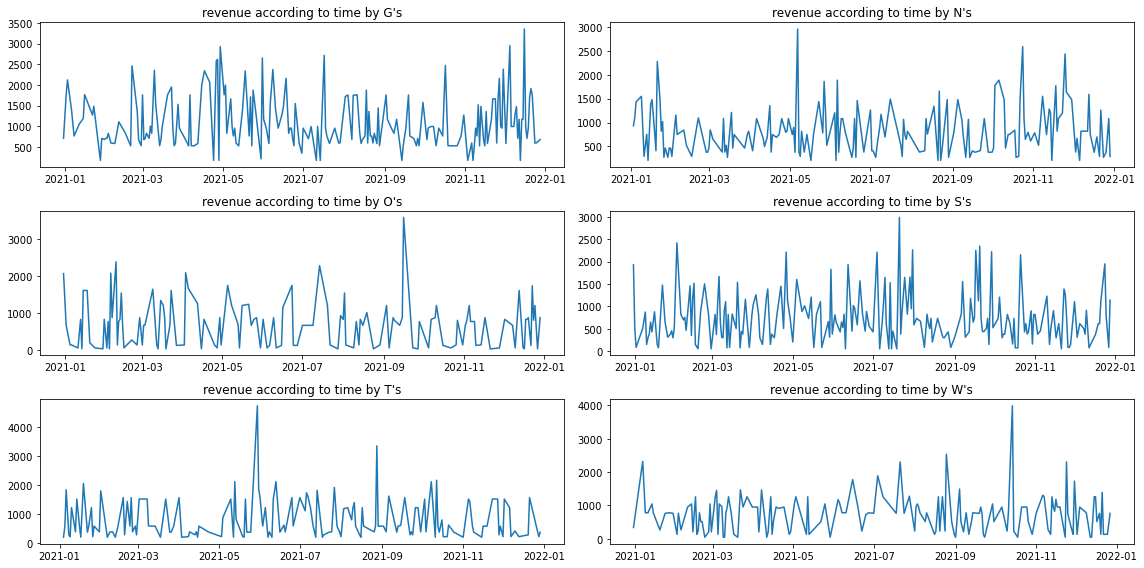

In [47]:
# 시간에 따른 브랜드별 매출 변화

fig = plt.figure(figsize=(16,8))

for i, brand in enumerate(sorted(list(data['brand'].unique()))):
    revenue_per_brand = data[data['brand'] == brand]
    brand_rev_per_time = revenue_per_brand.groupby('transaction_date').sum()['standard_cost']
    fig.add_subplot(3,2,i+1)
    plt.title("revenue according to time by {0}'s".format(brand))
    plt.plot(brand_rev_per_time, label=brand)
    fig.tight_layout()

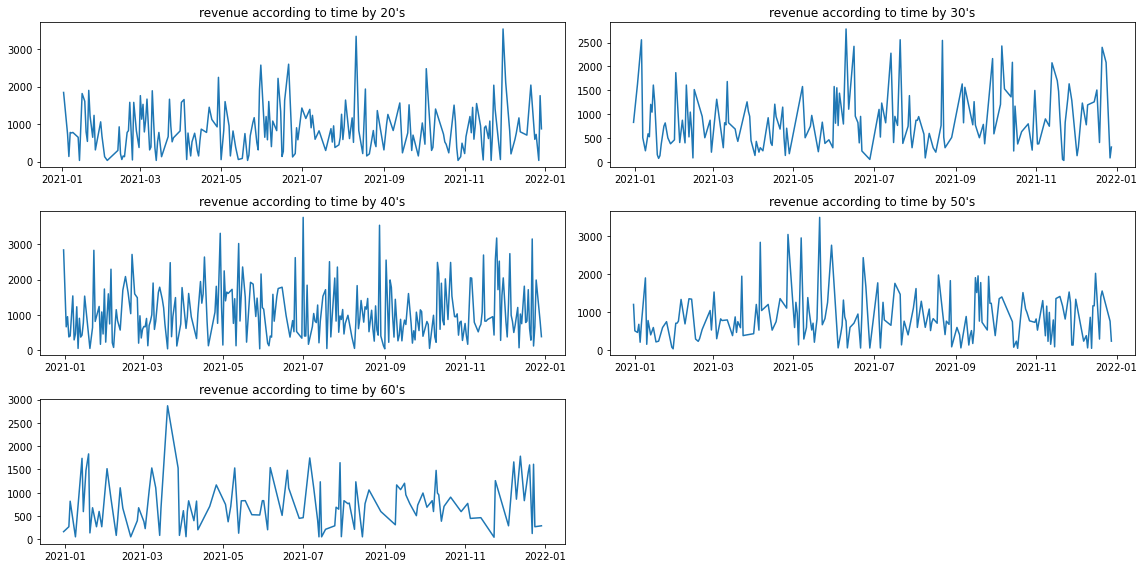

In [48]:
# 시간에 따른 연령대별 매출 변화

fig = plt.figure(figsize=(16,8))

for i, age in enumerate(sorted(list(data['ages'].unique()))):
    revenue_per_ages = data[data['ages'] == age]
    ages_rev_per_time = revenue_per_ages.groupby('transaction_date').sum()['standard_cost']
    fig.add_subplot(3,2,i+1)
    plt.title("revenue according to time by {0}'s".format(age))
    plt.plot(ages_rev_per_time, label=age)
    fig.tight_layout()

Text(0, 0.5, 'number of people')

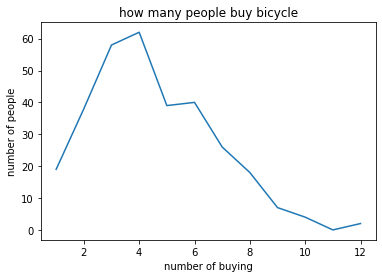

In [49]:
# 사람들의 재구매 횟수를 그래프로 그려봅시다

sells_cnt = data.groupby('customer_id').count()['transaction_id']
count_dict = {}
for cnt in range(1, sells_cnt.max()+1):
    count_dict[cnt] = 0
for cnt in sells_cnt:
    count_dict[cnt] += 1
    
plt.title('how many people buy bicycle')
plt.plot(pd.Series(count_dict))
plt.xlabel('number of buying')
plt.ylabel('number of people')

# 사람들이 해당 바이크샵을 4번까지 제일 많이 재구매하네요
# 그 후 쭉 떨어지는 모양새입니다

In [82]:
# retention chart 그려보기
import datetime

# 코호트를 첫 구매를 한 시점을 기준으로 나눕니다
# 1) 코호트를 나누는 날짜 pair 구하기
min_trans_date = data['transaction_date'].min()
max_trans_date = data['transaction_date'].max()
cohort_date = []
for n in range(1,14):
    start_end_date_pair = []
    if n == 1:
        next_trans_date = min_trans_date
        start_end_date_pair.append(next_trans_date)
        next_trans_date = next_trans_date + datetime.timedelta(weeks= 4)
        start_end_date_pair.append(next_trans_date)
    elif n == 13:
        start_end_date_pair.append(next_trans_date)
        next_trans_date = max_trans_date
        start_end_date_pair.append(next_trans_date)
    else:
        start_end_date_pair.append(next_trans_date)
        next_trans_date = next_trans_date + datetime.timedelta(weeks = 4)
        start_end_date_pair.append(next_trans_date)
    cohort_date.append(start_end_date_pair)

# 2) 각 코호트에 해당하는 유저 id 구하기    
cohort_user_id = []
total_user_id_basket = set(data['customer_id'].unique())
for month in range(13):
    user_id_basket = []
    if month == 0:
        cohort = data[data['transaction_date'] >= cohort_date[month][0]][data['transaction_date'] <= cohort_date[month][1]]
        user_id_list = cohort['customer_id'].unique()
    else:
        cohort = data[data['transaction_date'] > cohort_date[month][0]][data['transaction_date'] <= cohort_date[month][1]]
        user_id_list = cohort['customer_id'].unique()
    cohort_user_id.append(list(set(total_user_id_basket).intersection(set(user_id_list))))
    total_user_id_basket = set(total_user_id_basket) - set(user_id_list)

# 3) 리텐션 차트 구하기
retention_chart = pd.DataFrame(index = range(13),columns = ['M+{0}'.format(month) for month in range(0,13)])
volume_list = []

for m in range(13):
    cohort_index = []
    for customer_id in cohort_user_id[m]:
        cohort_one_df = data[data['customer_id'] == customer_id]
        cohort_index.extend(list(cohort_one_df.index))
    cohort_df = data.iloc[cohort_index,:]
    volume_list.append(len(cohort_user_id[m]))
    
    retention_month = []
    for month in range(13):
        if month == 0:
            cohort_month_df = cohort_df[cohort_df['transaction_date'] >= cohort_date[month][0]][cohort_df['transaction_date'] <= cohort_date[month][1]]
            retention_user_id = cohort_month_df['customer_id']
            retention_values = round(len(list(set(cohort_user_id[m]).intersection(set(retention_user_id)))) / len(cohort_user_id[m]),2)
        else:
            cohort_month_df = cohort_df[cohort_df['transaction_date'] > cohort_date[month][0]][cohort_df['transaction_date'] <= cohort_date[month][1]]
            retention_user_id = cohort_month_df['customer_id']
            retention_values = round(len(list(set(cohort_user_id[m]).intersection(set(retention_user_id)))) / len(cohort_user_id[m]),2)
        retention_month.append(retention_values)
    
    for idx in range(len(retention_month)):
        if retention_month[idx] != 0 :
            excluded_idx = idx
            retention_month = retention_month[idx:]
            break

    retention_month.extend([0 for i in range(excluded_idx)])
    
    retention_chart.iloc[m,:] = retention_month
    
retention_chart.index = ['cohort_{0}'.format(lst[0].strftime('%Y-%m-%d')) for lst in cohort_date]
retention_chart['volume'] = volume_list
retention_chart.drop('M+0',axis=1)


,M+1,M+2,M+3,M+4,M+5,M+6,M+7,M+8,M+9,M+10,M+11,M+12,volume
cohort_2020-12-31,0.33,0.35,0.27,0.26,0.31,0.28,0.35,0.27,0.25,0.25,0.4,0.31,95
cohort_2021-01-28,0.37,0.23,0.29,0.37,0.16,0.29,0.27,0.27,0.29,0.32,0.24,0,62
cohort_2021-02-25,0.26,0.32,0.3,0.3,0.22,0.3,0.28,0.18,0.24,0.22,0,0,50
cohort_2021-03-25,0.24,0.08,0.28,0.2,0.16,0.2,0.2,0.32,0.4,0,0,0,25
cohort_2021-04-22,0.24,0.48,0.33,0.43,0.33,0.19,0.33,0.43,0,0,0,0,21
cohort_2021-05-20,0.33,0.21,0.17,0.25,0.25,0.33,0.21,0,0,0,0,0,24
cohort_2021-06-17,0.2,0.3,0.3,0.4,0.5,0.4,0,0,0,0,0,0,10
cohort_2021-07-15,0.33,0.17,0.33,0.33,0.25,0,0,0,0,0,0,0,12
cohort_2021-08-12,0.0,0.33,0.17,0.17,0,0,0,0,0,0,0,0,6
cohort_2021-09-09,0.33,0.33,0.33,0,0,0,0,0,0,0,0,0,3


1. Day N 리텐션을 구해봤습니다. 2021.11월에 대부분의 코호트에서 리텐션이 올라가는 모습입니다. 이 달에 어떤 프로모션을 한게 아닐까 싶네요. <br>

2. Volume이 계속 줄어들고 있는 모습입니다. 즉, 해당 날짜에 처음 구매를 한 신규유저가 점점 줄어들고 있다는 의미입니다. 단골들은 아주 많지만 새로운 유저의 유입이 없습니다. <br>

Text(0, 0.5, 'ARPU')

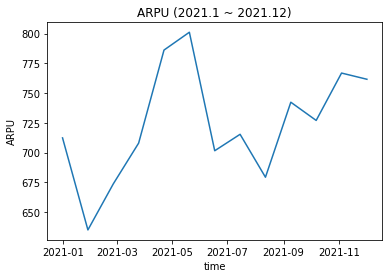

In [103]:
ARPUs = []
for month in range(13):
    if month == 0:
        cohort = data[data['transaction_date'] >= cohort_date[month][0]][data['transaction_date'] <= cohort_date[month][1]]
        paying_user = len(cohort['customer_id'].unique())
        Revenue = cohort['standard_cost'].sum()
        ARPU = Revenue / paying_user
        ARPUs.append(ARPU)
    else:
        cohort = data[data['transaction_date'] >= cohort_date[month][0]][data['transaction_date'] <= cohort_date[month][1]]
        paying_user = len(cohort['customer_id'].unique())
        Revenue = cohort['standard_cost'].sum()
        ARPU = Revenue / paying_user
        ARPUs.append(ARPU)

plt.title('ARPU (2021.1 ~ 2021.12)')
plt.plot(pd.Series(ARPUs, index = [cohort_date[m][0] for m in range(13)]))
plt.xlabel('time')
plt.ylabel('ARPU')

올해 초기에 ARPU가 가파른 상향세 보이다가, 떨어지는 모양새입니다. 11월에 리텐션이 꽤 높았는데, ARPU도 높게 나타남을 알 수 있습니다.

# 5. Summary of EDA

**<나이대와 판매량>** <br>
1. 회원수 : 40대 > 20대 = 30대 > 50대 > 60대 순 <br>
2. 평균 구매횟수 : 20대 > 50대 > 40대 > 60대 > 30대 순 <br>
3. 평균 구매주기(짧은 순) : 20대 > 50대 > 40대 > 30대 > 60대 순 <br>

**<Brand별 고유특성>** <br>
1. 판매량 : S > G > N > T > W > O
2. S : 저가, various model, small size ~ medium size
3. G : 고가, various model, big size
4. N : 중저가
5. T : 저가, Auto-less
6. W : 중저가, Auto-many
7. O : 고가 

**<나이대별 선호 브랜드>**<br>
1. 20대 : S > G > N > W = T = O
2. 30대 : S > N = T > G = W > O
3. 40대 : S = G > N > W > O = T
4. 50대 : S > G > W = N = T > O 
5. 60대 : G > N = S > T > O = W

**<매출에 대하여>**<br>
1. 나이대별 평균매출 : **60 ~ 50 > 40 ~ 20 ~ 30**
2. 브랜드별 평균매출 : **G > T > W > N > O > S**

**<기타 인사이트>**<br>
1. 나이대별 구매 가격 분포<br>
    -> 나이대별로 큰 차이 없음<br>

2. 나이대별 자차구매 분포<br>
    -> 20대에서 자차비율이 제일 낮다 / 30대에서 자차비율이 제일 높다 / 40-60대는 중간수준<br>

3. 나이대별 자산 분포<br>
    -> 50대가 제일 돈이 많다 / 20대가 의외로 돈이 많다 / 40대는 오히려 돈이 더 적고 / 60대가 제일 가난함<br>
    
4. 나이대별 마니아 분포 <br>
    -> 나이대별로 큰 차이 없음<br>

5. 시간에 따른 판매량 변화<br>
    -> 우상향보다는 계절성이 보이는 모습.<br>
    -> 브랜드나 나이대별로 분해해서 봤는데, 별 경향성이 나오지 않고 도수가 작아 판단하기 힘듦.<br>

6. 시간에 따른 매출 변화<br>
    -> 우상향보다는 계절성이 보이는 모습.<br>
    -> 브랜드나 나이대별로 분해해서 봤는데, 별 경향성이 나오지 않고 도수가 작아 판단하기 힘듦.<br>

7. 재구매 횟수<br>
    -> 사람들이 4번 정도를 바이크샵을 이용하고, 그 후부터는 쭉 떨어지는 모습.<br>

8. 리텐션 차트<br>
    -> 11월에 대부분의 코호트에서 리텐션이 올라가는 것으로 보아, 프로모션을 한 것으로 추정.<br>
    -> 신규유저의 유입이 현저히 줄어들고 있는 모습을 보임.<br>

# 6. Get Insight
**<연령 & 브랜드 관련 인사이트>**
1. 20대 : 자차비율이 가장 낮고, 저가 브랜드인 S를 선호하여 오토바이를 자주사는 사람들이 많다. 하지만 매출에는 크게 도움이 안되는 모습.(자산이 많은 편인데도 바이크는 싼 것을 선호)

2. 30대 : 자차비율이 가장 높아, 오토바이를 자주 구매하지 않는 것으로 보이는 집단. 때문에 구매횟수도 적고, 매출도 별로 안나온다.

3. 40대 : 등록된 회원수는 많지만 구매횟수나 구매주기가 그에 못미치는 집단. 의외로 돈이 적어서 매출에도 크게 기여하지 못함.

4. 50대 : 60대와 더불어 회원수는 적지만, 평균매출에 크게 기여하는 집단. 고가 브랜드인 G를 선호함.

5. 60대 : 회원수는 가장 적은데 매출에는 크게 기여하는 집단. 50대와 마찬가지로 G를 선호함.

**<그핵이에게 하는 조언>**

Bikeshop이 단골 고객으로만 이루어져 있는 것을 깨달을 필요가 있음. (신규 유저의 유입이 거의 없음)<br>

1) 판매하고 있는 서비스가 신규유저에게 통한다는 자신감이 있다면, Acquisition에 리소스를 투입해보는 것도 좋을 듯합니다.<br>

2) 단골 유저들이 많이 이용한다는 점에서, Retention 유지 전략도 중요하다고 생각합니다.<br>

    2-1) 리텐션 차트에서, 11월에 모든 코호트에서 재이용률이 높아지는 것을 관측했습니다. 프로모션을 진행한것이라면, 그 때 진행했던 프로모션을 참고하는 것도 좋아보입니다.
         아니라면, 그것에 영향을 미쳤던 내/외부 호재가 무엇인지 분석하는 것이 중요할 것이라고 생각합니다.

3) 프로모션 포인트

     3-1) 50대 회원은 회원수가 적은데, 구매주기가 짧고 구매횟수가 높습니다.(돈도 제일 많음) 또한 평균매출도 높은 집단입니다. 흔히 말해 "큰손"집단인데, 고가 브랜드를 선호하는 모습입니다.
          브랜드 G와 관련한 프로모션을 진행하면 효과적이라고 생각합니다.<br>

     3-2) 20대는 회원수도 많고, 구매주기도 짧고, 구매횟수도 많은편입니다. 그러나 평균 매출이 가장 낮은 집단입니다. 
          이들에게 비싼 상품을 판매하는 것이 아니라, 좀 더 가벼운 상품을 자주 구매할 수 있도록 유도하는게 좋지 않을까라는 생각입니다.<br>


# 번외)

In [104]:
# model number가 클 수록 비싼가?
data['model_number'] = data['model_number'].astype(int)

data[['model_number','standard_cost']].corr()

# 그건 아닌듯 하네요

,model_number,standard_cost
model_number,1.000000,0.037855
standard_cost,0.037855,1.000000


In [208]:
# 생일선물로 많이 구매하는 경향이 있나?

birthday_transaction = data[['birth_date','tran_month']].copy()
birthday_transaction['birth_month'] = birthday_transaction['birth_date'].dt.month

birthday_transaction['birth_bools'] = birthday_transaction['tran_month'] - birthday_transaction['birth_month']
birthday_transaction['birth_bools'] = birthday_transaction['birth_bools'].apply(lambda x: True if x==0 else False)
print(birthday_transaction['birth_bools'].value_counts())

data['birth_bools'] = birthday_transaction['birth_bools']
# 그건 아닌듯 하네요

False    1295
True      137
Name: birth_bools, dtype: int64


In [219]:
# 생일인 달에 구매한 회원들의 특성은 없을까?

birthday_df = data[data['birth_bools']==True]
non_birthday_df = data[data['birth_bools']==False]

compare_cols = ['ages','online_order','brand','automatic','product_class','product_size']

compare_df_list = []
for col in compare_cols:
    tmp_df = pd.DataFrame(index = list(data[col].unique()))
    tmp_df['birthday'] = birthday_df[col].value_counts() / birthday_df.shape[0]
    tmp_df['non_birthday'] = non_birthday_df[col].value_counts() / non_birthday_df.shape[0]
    compare_df_list.append(tmp_df)

# ages
compare_df_list[0]


,birthday,non_birthday
40,0.401460,0.341313
60,0.094891,0.098842
30,0.131387,0.180695
20,0.160584,0.208494
50,0.211679,0.170656


In [220]:
# online_order
compare_df_list[1]

,birthday,non_birthday
True,0.445255,0.467954
False,0.554745,0.532046


In [221]:
# brand
compare_df_list[2]

,birthday,non_birthday
S,0.204380,0.228571
T,0.167883,0.135135
W,0.109489,0.139768
N,0.175182,0.175290
G,0.226277,0.200000
O,0.116788,0.121236


In [222]:
# automatic
compare_df_list[3]

,birthday,non_birthday
True,0.693431,0.734363
False,0.306569,0.265637


In [223]:
# product_class
compare_df_list[4]

,birthday,non_birthday
2,0.583942,0.703475
3,0.291971,0.180695
1,0.124088,0.115830


In [224]:
# product_size
compare_df_list[5]

,birthday,non_birthday
2,0.613139,0.650193
1,0.240876,0.182239
3,0.145985,0.167568


딱히 생일이랑 구매는 연관이 없는듯 해요